# <center>Linear Responce</center>

Linear response theory is a theoretical framework used to describe how a system responds to an external perturbation (like magnetic field). It provides a way to understand macroscopic responses in terms of microscopic properties. In the context of Heisenberg model we are going to explore <i>spin-wave excitations</i> and energy levels where their response is the strongest. To begin we need a wave vector $q$:

### <center>$q = \frac{2\pi}{L}$</center>

Where $k$ is a wave mode integer and it ranges from $0$ to $L$. We use them to construct a <i>spin-wave operator $\hat{S}_q^z$</i>:

### <center>$\hat{S}_q^z = \sum_ie^{lqi}\hat{S}_i^z$</center>

We can see that it sums up spin-projection operators for every spin and multiplies them by complex exponent factor. We can check now the formula for linear response:

### <center>$S(q, \omega) = \sum_{n, m}\frac{1}{Z}e^{\beta\epsilon_n}|\langle n|\hat{S^z_q}|m\rangle|^2 \delta(\omega + \epsilon_n - \epsilon_m)$</center>

Where $Z = \sum_ne^{\beta\epsilon_n}$ is a <i>partition function</i>, $|n\rangle$ and $|m\rangle$ are system's eigenstates. We are using here <i>Dirac's delta function</i>:

### <center>$\delta(\omega + \epsilon_n - \epsilon_m) = 1 \Leftrightarrow \omega = \epsilon_m - \epsilon_n$</center>

and $0$ otherwise. It eliminates terms where $\omega$ is far from excitation energy. Let's implement it in a code.

In [1]:
import sys
sys.path.append('..')

In [2]:
from OperatorFunctions import wave_vector
from CommonFunctions import dirac_delta_function
from HamiltonianClass import QuantumState
from IPython.display import display, Latex
import numpy as np
import ipywidgets
from matplotlib import pyplot as plt

# variable used to improve notation
rangle = r'\rangle'
hat_S = r'\hat{S}'

In [3]:
L = 4
J = 1
delta = 1
quantum_state = QuantumState(L, J, delta, is_reduced=True, is_pbc=True)

First we have to create range of $\omega$. We do it by subtraction:

### <center>$\omega_{max} = \epsilon_{2^L} - \epsilon_0$</center>

Where $\epsilon_i$ means <i>ith</i> eigenvalue.

In [4]:
omega_max = quantum_state.get_nth_eigenvalue(quantum_state.size - 1) - quantum_state.get_nth_eigenvalue(0)
display(Latex(f'$\omega = {round(omega_max, 2)}$'))

<IPython.core.display.Latex object>

Now we create a range from $(-\omega_{max}, \omega_{max})$ and we define $bin = 0.1$:

In [5]:
bin_ = 0.2
omega_range = quantum_state.generate_linspace_of_omega(bin_, boundary=(-omega_max, omega_max))
print(omega_range)

[-3.00000000e+00 -2.80000000e+00 -2.60000000e+00 -2.40000000e+00
 -2.20000000e+00 -2.00000000e+00 -1.80000000e+00 -1.60000000e+00
 -1.40000000e+00 -1.20000000e+00 -1.00000000e+00 -8.00000000e-01
 -6.00000000e-01 -4.00000000e-01 -2.00000000e-01  3.55271368e-15
  2.00000000e-01  4.00000000e-01  6.00000000e-01  8.00000000e-01
  1.00000000e+00  1.20000000e+00  1.40000000e+00  1.60000000e+00
  1.80000000e+00  2.00000000e+00  2.20000000e+00  2.40000000e+00
  2.60000000e+00  2.80000000e+00]


And we make use of <i>Dirac's delta function</i> to find a calculated linear response for specific $\omega$.

In [6]:
dirac = np.vectorize(dirac_delta_function)(omega_range, 2.8, bin_)
print(dirac)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]


Now we list all possible wave vectors $q$:

In [7]:
k_list = [k for k in range(L + 1)]
wave_vectors = [wave_vector(L, k) for k in k_list]
print(wave_vectors)

[0.0, 1.5707963267948966, 3.141592653589793, 4.71238898038469, 6.283185307179586]


We can notice that in practice they are just multipliers of $\frac{\pi}{2}$

Now we define $\hat{S}_q^z$ operator:

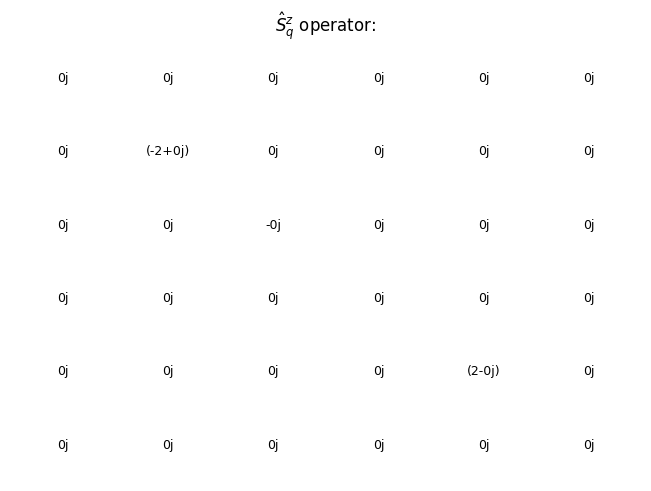

In [8]:
figure1, axes1 = plt.subplots(1, 1, layout='constrained')
axes1.set_title('$\hat{S}_q^z$ operator:')

sq_operator = quantum_state.set_sq_operator(wave_vectors[2], assign=False)
quantum_state.plot_data(matrix=sq_operator, axes=axes1)
plt.show()

And now let's check for different parameters:

In [9]:
def plot_sq_operator(wave_vector_number=0):
    L=4
    state = QuantumState(L, 1, 1, is_pbc=True, is_reduced=True)
    operator = state.set_sq_operator(wave_vector(L, wave_vector_number), assign=False)
    figure, axes = plt.subplots(1, 1, layout='constrained')
    axes.set_title('$\hat{S}_q^z$ operator:')
    state.plot_data(matrix=operator, axes=axes)
    plt.show()

In [10]:
ipywidgets.interact(plot_sq_operator, wave_vector_number=(0, 4, 1))

interactive(children=(IntSlider(value=0, description='wave_vector_number', max=4), Output()), _dom_classes=('w…

<function __main__.plot_sq_operator(wave_vector_number=0)>

Now we can calculate linear response $S(q, \omega)$ for given range of $\omega$ (in this case we have to specify temperature $T$ of the system):

In [11]:
def plot_linear_response(J=1, delta=1, k_number=4, T='infinity', bin_=0.1):
    if J != 0:
        L = 8
        state = QuantumState(L, J, delta, is_reduced=True, is_pbc=True)
        omega_range = state.generate_linspace_of_omega(bin_)
        state.set_sq_operator(k_number)
        T = float('inf') if T=='infinity' else T
        response = state.calculate_linear_response(omega_range, bin_, T)

        figure, axes = plt.subplots(1, 1, layout='constrained')
        axes.plot(omega_range, response, color='black')
        axes.set(xlabel=f'$\omega$', ylabel='$S(q, \omega)$')
        temperature = r'\infty' if T=='infinity' else T
        axes.set_title(f'Linear response $S(q, \omega)$, $T = {temperature}$')
        axes.grid()
        plt.show()

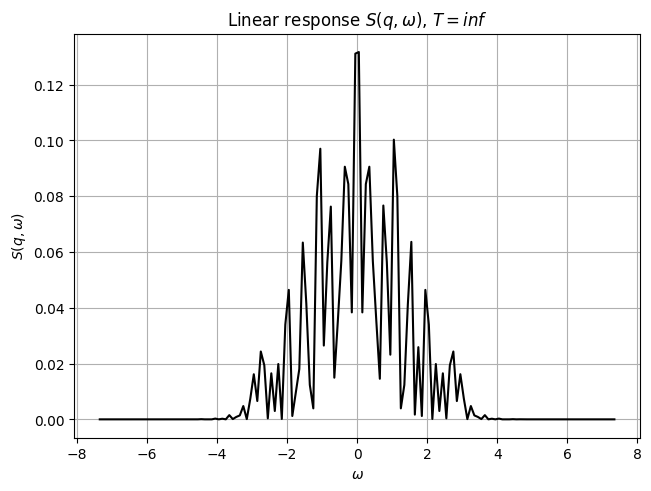

In [12]:
plot_linear_response(J=1, delta=2, k_number=4, T='infinity', bin_=0.1)

And now let's see all possible graphs below:

In [13]:
ipywidgets.interact(plot_linear_response,
                    J=(-3, 3, 0.2),
                    delta=(0, 2, 0.1),
                    k_number=(0, 8, 1),
                    T=[0, 0.5, 1, 'infinity'],
                    bin_=[0.05, 0.1, 0.2, 0.5])  

interactive(children=(FloatSlider(value=1.0, description='J', max=3.0, min=-3.0, step=0.2), FloatSlider(value=…

<function __main__.plot_linear_response(J=1, delta=1, k_number=4, T='infinity', bin_=0.1)>

And finally we can create a 2D grid:

In [14]:
from matplotlib.colors import LinearSegmentedColormap

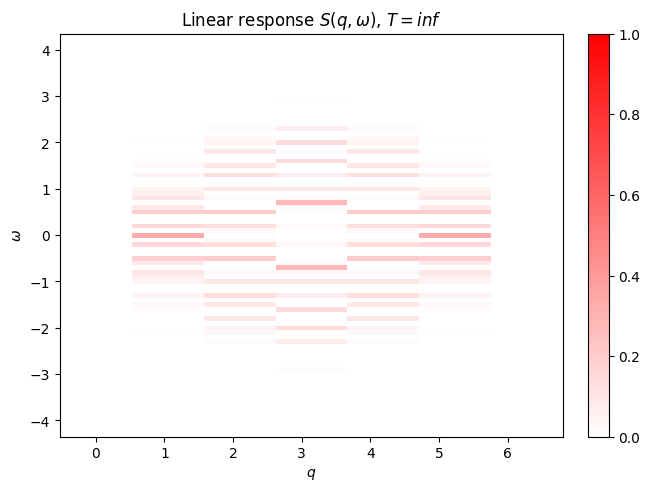

In [15]:
def plot_linear_response_grid(J=1, delta=1, T='infinity', bin_=0.1):
    if J != 0:
        L = 6
        state = QuantumState(L, J, delta, is_reduced=True, is_pbc=True)
        omega_range = state.generate_linspace_of_omega(bin_)
        k_list = [k for k in range(0, L + 1)]
        wave_vecor_range = np.array([wave_vector(L, k) for k in k_list])
        T = float('inf') if T=='infinity' else T
        temperature = r'\infty' if T=='infinity' else T

        linear_response_grid = None
        for wavevector, k in zip(wave_vecor_range, k_list):
            state.set_sq_operator(wavevector)
            if k == 0:
                linear_response_grid = state.calculate_linear_response(omega_range, bin_, T)[:, None]
            else:
                response = state.calculate_linear_response(omega_range, bin_, T)[:, None]
                linear_response_grid = np.concatenate((linear_response_grid, response), axis=1)

        figure, axes = plt.subplots(1, 1, layout='constrained')
        cmap = LinearSegmentedColormap.from_list('rg', ["w", "r"], N=256)
        sq_min, sq_max = 0, int(linear_response_grid.max())
        sq_max = 1 if sq_max == 0 else sq_max

        grid = axes.pcolormesh(wave_vecor_range, omega_range, linear_response_grid, 
                               cmap=cmap, vmin=sq_min, vmax=sq_max)
        figure.colorbar(grid, ax=axes)
        axes.set(xlabel='$q$', ylabel='$\omega$')
        axes.set_title(f'Linear response $S(q, \omega)$, $T = {temperature}$')
        plt.show()
plot_linear_response_grid()

... and interact with it:

In [16]:
ipywidgets.interact(plot_linear_response_grid, 
                    J=(-3, 3, 0.2),
                    delta=(0, 2, 0.1),
                    T=[0, 0.5, 1, 'infinity'],
                    bin_=[0.05, 0.1, 0.2, 0.5])

interactive(children=(FloatSlider(value=1.0, description='J', max=3.0, min=-3.0, step=0.2), FloatSlider(value=…

<function __main__.plot_linear_response_grid(J=1, delta=1, T='infinity', bin_=0.1)>